In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_parquet("../data/train_2023.parquet")
len(df)

407605

In [ ]:
df.head()

In [30]:
df.columns

Index(['Id', 'customer_id', 'interest_rate', 'name', 'country',
       'date_of_birth', 'address', 'date', 'atm_transfer_in',
       'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out',
       'crypto_in', 'crypto_out', 'bank_transfer_in_volume',
       'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume',
       'complaints', 'touchpoints', 'csat_scores', 'tenure', 'from_competitor',
       'job', 'churn_due_to_fraud', 'model_predicted_fraud'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407605 entries, 0 to 407604
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Id                        407605 non-null  int64         
 1   customer_id               407605 non-null  int64         
 2   interest_rate             407605 non-null  float64       
 3   name                      407605 non-null  object        
 4   country                   407605 non-null  object        
 5   date_of_birth             407605 non-null  object        
 6   address                   407605 non-null  object        
 7   date                      407605 non-null  datetime64[ns]
 8   atm_transfer_in           407605 non-null  int64         
 9   atm_transfer_out          407605 non-null  int64         
 10  bank_transfer_in          407605 non-null  int64         
 11  bank_transfer_out         407605 non-null  int64         
 12  cr

In [32]:
df.describe()

,Id,customer_id,interest_rate,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,tenure
count,4.076050e+05,407605.000000,407605.0,407605,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000
mean,4.091030e+06,68587.637853,2.5,2023-07-02 20:55:43.648876288,0.160786,0.176831,1727.744081,1347.855497,13.796681,4.568722,3019.818161,2161.732796,178.977368,84.478050,0.020601,939.905202
min,3.868940e+06,5.000000,2.5,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.071042,8.186725,3.283762,1.333526,0.000000,0.000000
25%,3.980051e+06,50442.000000,2.5,2023-04-03 00:00:00,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,116.662435,29.035841,44.917010,13.574802,0.000000,368.000000
50%,4.091120e+06,74342.000000,2.5,2023-07-03 00:00:00,0.000000,0.000000,449.000000,4.000000,1.000000,1.000000,947.075295,100.858238,60.588088,18.591522,0.000000,760.000000
75%,4.202014e+06,90487.000000,2.5,2023-10-01 00:00:00,0.000000,0.000000,1974.000000,1304.000000,9.000000,8.000000,2320.162790,330.828029,200.164546,49.494933,0.000000,1178.000000
max,4.312994e+06,106186.000000,2.5,2023-12-31 00:00:00,1724.000000,2058.000000,28062.000000,18132.000000,81.000000,73.000000,39528.455670,34826.611604,2035.282630,1214.428467,3.000000,5821.000000
std,1.281808e+05,26825.879962,0.0,NaN,11.613992,15.213412,2911.317541,2410.232953,21.065859,5.276783,4450.370953,3917.199225,232.489912,131.067896,0.215948,997.011927


In [33]:
len(df[df['churn_due_to_fraud'] == True])

4

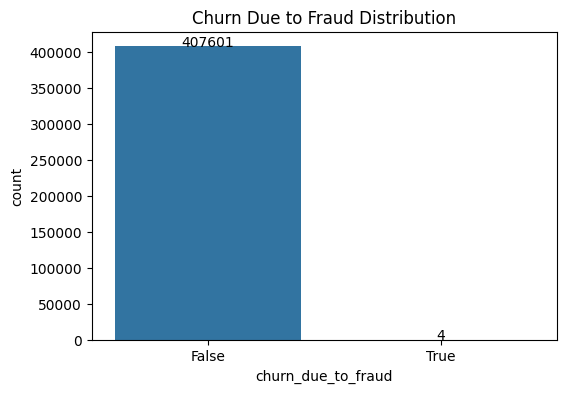

In [34]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='churn_due_to_fraud', data=df)

# Annotate each bar with its count
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.5,  # Position above the bar
            int(p.get_height()),  # The count
            ha='center')  # Center align the text

plt.title('Churn Due to Fraud Distribution')
plt.show()

In [35]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()


Correlation Matrix:


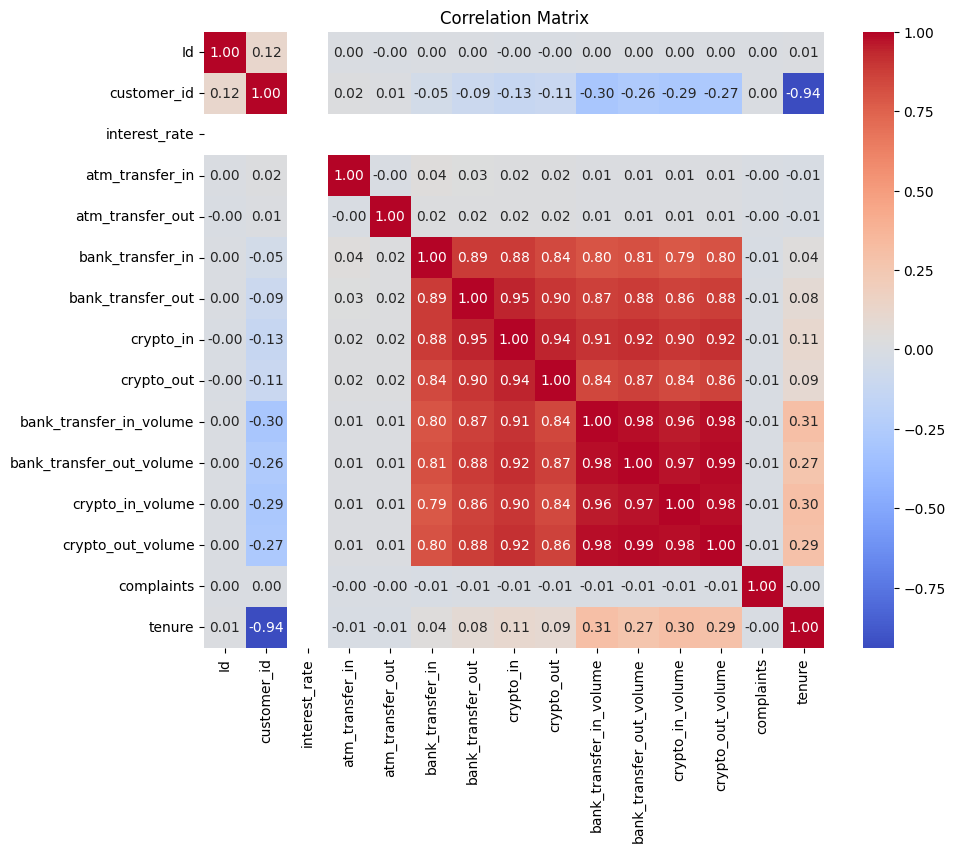

In [36]:
# Correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

print("\nCorrelation Matrix:")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [38]:
years = range(2008, 2024)
file_path_pattern = "../data/train_{year}.parquet"

total_churn_due_to_fraud = 0
total_records = 0

for year in years:
    file_path = file_path_pattern.format(year=year)
    try:
        df = pd.read_parquet(file_path)

        year_total_records = len(df)
        total_records += year_total_records

        churn_count = df['churn_due_to_fraud'].sum()
        total_churn_due_to_fraud += churn_count

        print(f"Year {year}: {churn_count} records (Total records: {year_total_records})")
    except Exception as e:
        print(f"Error processing file for year {year}: {e}")

print(f"Total records across all datasets: {total_records}")
print(f"Total records where 'churn_due_to_fraud' is True: {total_churn_due_to_fraud}")

Year 2008: 0 records (Total records: 46510)
Year 2009: 0 records (Total records: 82852)
Year 2010: 1 records (Total records: 129439)
Year 2011: 0 records (Total records: 158736)
Year 2012: 2 records (Total records: 161235)
Year 2013: 0 records (Total records: 188359)
Year 2014: 2 records (Total records: 216988)
Year 2015: 0 records (Total records: 241032)
Year 2016: 5 records (Total records: 257669)
Year 2017: 4 records (Total records: 271686)
Year 2018: 1 records (Total records: 304289)
Year 2019: 3 records (Total records: 533065)
Year 2020: 2 records (Total records: 264256)
Year 2021: 3 records (Total records: 282250)
Year 2022: 0 records (Total records: 380087)
Year 2023: 4 records (Total records: 407605)
Total records across all datasets: 3926058
Total records where 'churn_due_to_fraud' is True: 27
